## Install

In [1]:
%pip install clip-retrieval img2dataset

  Using cached urllib3-1.26.19-py2.py3-none-any.whl.metadata (49 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.5/343.5 kB 7.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 41.9 MB/s eta 0:00:00:00:0100:01
Using cached urllib3-1.26.19-py2.py3-none-any.whl (143 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.2
    Uninstalling urllib3-2.2.2:
      Successfully uninstalled urllib3-2.2.2
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 15.0.2
    Uninstalling pyarrow-15.0.2:
      Successfully uninstalled pyarrow-15.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
types-requests 2.32.0.20240622 requires urllib3>=2, but you have urllib3 1.26.19 which is incompatible.


## Get some image urls

In [5]:
!echo "https://www.bluecross.org.uk/sites/default/files/assets/images/124044lpr.jpg" >> myimglist.txt
!echo "https://static.boredpanda.com/blog/wp-content/uploads/2018/04/5acb63d83493f__700-png.jpg" >> myimglist.txt
!echo "https://www.argospetinsurance.co.uk/assets/uploads/2017/12/cat-pet-animal-domestic-104827.jpeg" >> myimglist.txt


## Download the image urls

In [22]:
!img2dataset --url_list=myimglist.txt --output_folder=image_folder --thread_count=64 --image_size=256

Starting the downloading of this file
Sharding file number 1 of 1 called /home/faheem/Workspace/clip-retrieval/notebook/myimglist.txt
0it [00:00, ?it/s]File sharded in 1 shards
1it [00:30, 30.80s/it]
worker  - success: 0.584 - failed to download: 0.357 - failed to resize: 0.059 - images per sec: 23 - count: 658
total   - success: 0.584 - failed to download: 0.357 - failed to resize: 0.059 - images per sec: 23 - count: 658


## Produce embeddings

In [1]:
!clip-retrieval inference  --input_dataset /home/faheem/Workspace/open_clip/coco2017/val2017 --output_folder embedding_folder

/home/faheem/miniconda3/envs/clip/lib/python3.8/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/faheem/miniconda3/envs/clip/lib/python3.8/site-packages/torch/cuda/__init__.py:749: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count
The number of samples has been estimated to be 5000
Starting the worker
dataset is 49
Starting work on task 0
/home/faheem/miniconda3/envs/clip/lib/python3.8/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/faheem/miniconda3/envs/clip/lib/python3.8/site-packages/torch/cuda/__init__.py:

In [24]:
!ls -R embedding_folder

embedding_folder:
img_emb  metadata  stats

embedding_folder/img_emb:
img_emb_0.npy

embedding_folder/metadata:
metadata_0.parquet

embedding_folder/stats:
0.json


## Produce knn indices

In [25]:
!clip-retrieval index --embeddings_folder=embedding_folder --index_folder=index_folder

/home/faheem/miniconda3/envs/clip/lib/python3.8/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/faheem/miniconda3/envs/clip/lib/python3.8/site-packages/torch/cuda/__init__.py:749: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count
2024-06-30 18:08:19,167 [INFO]: Using 12 omp threads (processes), consider increasing --nb_cores if you have more
2024-06-30 18:08:19,167 [INFO]: Launching the whole pipeline 06/30/2024, 18:08:19
2024-06-30 18:08:19,167 [INFO]: Reading total number of vectors and dimension 06/30/2024, 18:08:19
100%|███████████████████████████████████████████| 1/1 [00:00<00:00

## Use the index to get a subset of files

In [26]:
!clip-retrieval filter --query "cat" --output_folder "cat/" --indice_folder "index_folder"

/home/faheem/miniconda3/envs/clip/lib/python3.8/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/faheem/miniconda3/envs/clip/lib/python3.8/site-packages/torch/cuda/__init__.py:749: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count
Found 100 items with query 'cat'
The minimum distance is 0.27 and the maximum is 0.29
You may want to use these numbers to increase your --num_results parameter. Or use the --threshold parameter.
Copying the images in cat/


In [27]:
!ls

cat				      knn.index
clip-client-query-api.ipynb	      metadata_0.1.parquet
clip-retrieval-getting-started.ipynb  myimglist.parquet
embedding_folder		      myimglist.txt
embeddings			      newcat.jpg
image_folder			      retrieval_example.ipynb
index_folder			      simple_filter.ipynb
infos.json


In [28]:
%ls -R cat

cat:
000000001.jpg  000000126.jpg  000000292.jpg  000000417.jpg  000000576.jpg
000000005.jpg  000000127.jpg  000000293.jpg  000000421.jpg  000000577.jpg
000000009.jpg  000000154.jpg  000000294.jpg  000000434.jpg  000000589.jpg
000000010.jpg  000000155.jpg  000000295.jpg  000000449.jpg  000000592.jpg
000000013.jpg  000000158.jpg  000000300.jpg  000000458.jpg  000000593.jpg
000000018.jpg  000000168.jpg  000000328.jpg  000000462.jpg  000000597.jpg
000000019.jpg  000000171.jpg  000000333.jpg  000000464.jpg  000000603.jpg
000000028.jpg  000000175.jpg  000000335.jpg  000000469.jpg  000000607.jpg
000000047.jpg  000000188.jpg  000000342.jpg  000000479.jpg  000000608.jpg
000000051.jpg  000000206.jpg  000000344.jpg  000000482.jpg  000000611.jpg
000000055.jpg  000000207.jpg  000000353.jpg  000000483.jpg  000000612.jpg
000000059.jpg  000000211.jpg  000000357.jpg  000000486.jpg  000000619.jpg
000000063.jpg  000000216.jpg  000000360.jpg  000000495.jpg  000000620.jpg
000000067.jpg  000000243.jpg  000

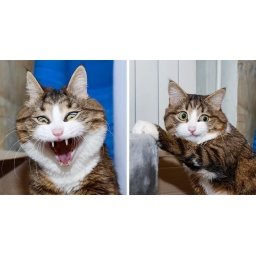

In [29]:
from IPython.display import Image
Image(filename='cat/000000001.jpg') 

## Run the knn service backend

In [30]:
%%bash
echo '{"example_index": "index_folder"}' > indices_paths.json
npm install -g localtunnel

bash: line 2: npm: command not found


CalledProcessError: Command 'b'echo \'{"example_index": "index_folder"}\' > indices_paths.json\nnpm install -g localtunnel\n'' returned non-zero exit status 127.

In [ ]:
# after running the next cell, visit the localtunnel url once then go to
# https://rom1504.github.io/clip-retrieval/?back=<your local tunnel url here>

In [1]:
from threading import Thread

def app():
  !clip-retrieval back --port 1234 --indices-paths indices_paths.json

if __name__ == '__main__':
    t1 = Thread(target = app)
    a = t1.start()
    !lt --port 1234

your url is: https://full-spiders-smoke.loca.lt
starting boot of clip back
warming up with batch size 1 on cuda
done warming up in 11.051630735397339s
/home/faheem/miniconda3/envs/clip/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
indices loaded
 * Serving Flask app 'clip_retrieval.clip_back'
 * Debug mode: off
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:1234
 * Running on http://131.227.94.150:1234
Press CTRL+C to quit
10.77.193.128 - - [06/Jul/2024 15:46:37] "GET / HTTP/1.1" 304 -
10.77.193.128 - - [06/Jul/2024 15:46:37] "GET /vendor/webcomponents-loader.js HTTP/1.1" 404 -
10.77.193.128 - - [06/Jul/2024 15:46:37] "GET /vendor/custom-elements-es5-adapter.js HTTP/1.1" 304 -
10.77.193.128 - - [06/Jul/2024 15:46:37] "GET /main.b3021b6a.js HT